<a href="https://colab.research.google.com/github/mohamed-mah-moustafa/Network-Security-and-Customer-Analytics/blob/main/ML_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Intrusion Detection, Customer Segmentation, and Image Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ------ Intrusion Detection System ------

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the dataset
df = pd.read_csv('Sample_KDD(2).csv')

# 2. Convert the 'class' column (text) into numbers
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# check what numbers were assigned
print("Class Mapping:")
# prints which number corresponds to which text (e.g., 0=anomaly, 1=normal)
for i, item in enumerate(le.classes_):
    print(f"{item} = {i}")

# Show the first 5 rows
print("\nFirst 5 rows of data:")
print(df.head())

Class Mapping:
anomaly = 0
normal = 1

First 5 rows of data:
   duration  src_bytes  dst_bytes  count  srv_count  serror_rate  \
0         0        520          0    428        428          0.0   
1         0          0          0    131         18          0.0   
2         0          0          0     20          8          1.0   
3         0       1235        404      1          4          0.0   
4         0        224       1415      1          1          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  ...  \
0              0.0          0.0              0.0           1.00  ...   
1              0.0          1.0              1.0           0.14  ...   
2              1.0          0.0              0.0           0.40  ...   
3              0.0          0.0              0.0           1.00  ...   
4              0.0          0.0              0.0           1.00  ...   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                 255   

In [ ]:
# 1. Separate the data into two groups
normal_data = df[df['class'] == 1]  # Assuming 1 is normal
anomaly_data = df[df['class'] == 0] # Assuming 0 is anomaly

# 2. Find the minimum count to balance them
# We take the size of the smaller group and limit the larger group to that size.
min_count = min(len(normal_data), len(anomaly_data))

balanced_normal = normal_data.sample(n=min_count, random_state=42)
balanced_anomaly = anomaly_data.sample(n=min_count, random_state=42)

# 3. Combine them back into one balanced dataset
balanced_df = pd.concat([balanced_normal, balanced_anomaly])

# 4. Split into Features (X) and Labels (y)
# X = all columns EXCEPT 'class'
# y = ONLY the 'class' column
X = balanced_df.drop('class', axis=1)
y = balanced_df['class']

# 5. Split into Train (70%) and Test (30%)
# stratify=y ensures the 70/30 split keeps the 50/50 normal/anomaly ratio inside the train/test sets too.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("Counts in Training set:\n", y_train.value_counts())
print("Counts in Testing set:\n", y_test.value_counts())

Training set size: 140
Testing set size: 60
Counts in Training set:
 class
0    70
1    70
Name: count, dtype: int64
Counts in Testing set:
 class
1    30
0    30
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# 1. Create the AI model (an empty brain)
clf = Perceptron(random_state=42)

# 2. Train the model (Show it the questions and answers)
print("Training the model...")
clf.fit(X_train, y_train)

# 3. Test the model (Give it an exam)
print("Making predictions...")
y_pred = clf.predict(X_test)

# 4. Grade the exam
accuracy = accuracy_score(y_test, y_pred)

print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")

Training the model...
Making predictions...
Perceptron Accuracy: 93.33%


--- PRE-PROCESSING: SCALING DATA ---
Data scaled successfully. Now K-Means can see all columns equally.

--- GENERATING CLUSTERING REPORTS ---

>> Analyzing for k=2 clusters...
   Cluster 0: 72.9% Normal, 27.1% Anomaly. (Dominant: Normal)
   Cluster 1: 0.0% Normal, 100.0% Anomaly. (Dominant: Anomaly)
   -> Overall Accuracy for k=2: 81.43%

>> Analyzing for k=3 clusters...
   Cluster 0: 88.3% Normal, 11.7% Anomaly. (Dominant: Normal)
   Cluster 1: 0.0% Normal, 100.0% Anomaly. (Dominant: Anomaly)
   Cluster 2: 10.0% Normal, 90.0% Anomaly. (Dominant: Anomaly)
   -> Overall Accuracy for k=3: 92.14%

>> Analyzing for k=4 clusters...
   Cluster 0: 0.0% Normal, 100.0% Anomaly. (Dominant: Anomaly)
   Cluster 1: 94.4% Normal, 5.6% Anomaly. (Dominant: Normal)
   Cluster 2: 10.0% Normal, 90.0% Anomaly. (Dominant: Anomaly)
   Cluster 3: 0.0% Normal, 100.0% Anomaly. (Dominant: Anomaly)
   -> Overall Accuracy for k=4: 95.71%

--- GENERATING GRAPHS ---



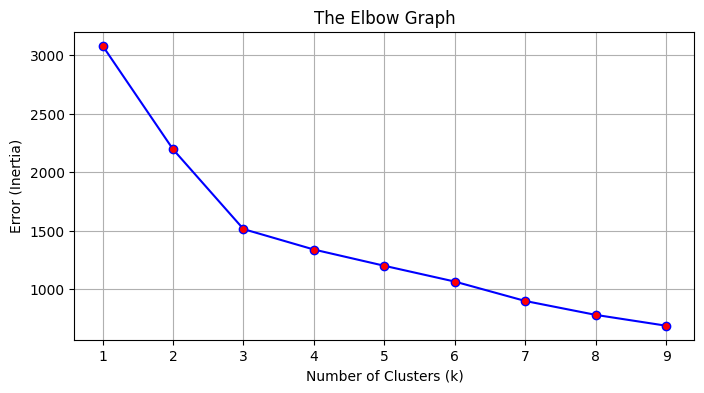

Drawing Scatter Plot for k=2...


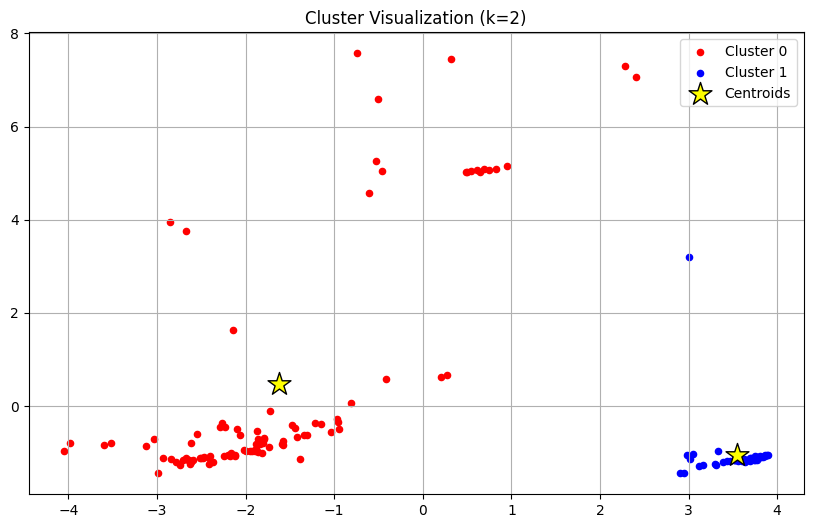

In [ ]:
# --- MASTER CELL: Task 1c, 1d, and Visualization ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# SCALING THE DATA
print("--- PRE-PROCESSING: SCALING DATA ---")
# K-Means fails if one column has huge numbers (Bytes) and another has small (Duration).
# We must scale them so they are all treated equally.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("Data scaled successfully. Now K-Means can see all columns equally.\n")


#Text Report (Percentages & Accuracy)
print("--- GENERATING CLUSTERING REPORTS ---\n")

# We loop through 3 scenarios: k=2, k=3, and k=4
for k in [2, 3, 4]:
    print(f">> Analyzing for k={k} clusters...")

    # 1. THE BRAIN
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # 2. THE TRAINING
    kmeans.fit(X_train_scaled)

    # 3. THE LABELS
    cluster_labels = kmeans.labels_

    # 4. THE CHECK
    comparison_df = pd.DataFrame({'Cluster_ID': cluster_labels, 'Real_Label': y_train.values})

    correct_guesses = 0

    for i in range(k):
        # Get just the rows in this specific group
        group_data = comparison_df[comparison_df['Cluster_ID'] == i]

        # Count Normal (1) vs Anomaly (0)
        counts = group_data['Real_Label'].value_counts()
        normal_count = counts.get(1, 0)
        anomaly_count = counts.get(0, 0)
        total = len(group_data)

        if total > 0:
            norm_pct = (normal_count / total) * 100
            anom_pct = (anomaly_count / total) * 100
            majority_label = 1 if normal_count > anomaly_count else 0
            majority_count = max(normal_count, anomaly_count)
        else:
            norm_pct, anom_pct, majority_count = 0, 0, 0

        correct_guesses += majority_count

        print(f"   Cluster {i}: {norm_pct:.1f}% Normal, {anom_pct:.1f}% Anomaly. (Dominant: {'Normal' if majority_label==1 else 'Anomaly'})")

    accuracy = correct_guesses / len(y_train)
    print(f"   -> Overall Accuracy for k={k}: {accuracy*100:.2f}%\n")



# PART B: The Graphs (Elbow & Scatter)
print("--- GENERATING GRAPHS ---\n")

# GRAPH 1: The Elbow Method
inertias = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_train_scaled) # Use Scaled Data
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-', markerfacecolor='red')
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Error (Inertia)')
plt.grid(True)
plt.show()

# GRAPH 2: Scatter Plot
best_k = 2
print(f"Drawing Scatter Plot for k={best_k}...")

# Retrain for the plot
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(X_train_scaled)

# Squash data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Draw it
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple']

for i in range(best_k):
    points = X_pca[final_labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=20, c=colors[i], label=f'Cluster {i}')

# Paint the stars (Centroids)
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='yellow', marker='*', edgecolors='black', label='Centroids')

plt.title(f'Cluster Visualization (k={best_k})')
plt.legend()
plt.grid(True)
plt.show()

# ---Marketing Analytics Customer Segmentation ---

In [ ]:
# --- TASK 2: CUSTOMER SEGMENTATION MASTER CELL ---
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. PRE-PROCESSING
print("--- PRE-PROCESSING DATA ---")

# 1. Load the new dataset
df_mall = pd.read_csv('mall_customer.csv')

# A. Select the features we want to use
numeric_cols = ['Age', 'IncomeLevel', 'ElectronicsSpending', 'ClothingSpending',
                'GrocerySpending', 'HomeSpending', 'Visits', 'PurchaseFrequency',
                'OnlineActivity', 'EmailOpens', 'AppUsage', 'LoyaltyPoints']
categorical_cols = ['Gender', 'MembershipLevel']

# B. One-Hot Encoding (for Gender & Membership)
# This converts "Male" -> [0, 1] and "Bronze" -> [1, 0, 0]
encoder = OneHotEncoder(sparse_output=False) # sparse_output=False ensures we get a normal array
encoded_cats = encoder.fit_transform(df_mall[categorical_cols])

# C. Standardization makes Age (20-80) and Income (30k-100k) weigh equally.
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(df_mall[numeric_cols])

# D. Combine them into one big "Feature Matrix" (X)
# We stack the scaled numbers and encoded categories side by side
X_final = np.hstack([scaled_nums, encoded_cats])

print("Data processed successfully.")
print(f"Original shape: {df_mall.shape}")
print(f"Processed shape: {X_final.shape} (More columns due to encoding)\n")


# 2. CLUSTERING & ANALYSIS
print("--- GENERATING BUSINESS REPORTS ---")

for k in [2, 3, 4]:
    print(f"\n==========================================")
    print(f"ANALYSIS FOR K={k} SEGMENTS")
    print(f"==========================================")

    # Train the model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_final)

    # Add labels temporarily to our original dataframe to calculate stats
    df_mall['Cluster'] = labels

    # Calculate Insights
    for i in range(k):
        # Filter data for this cluster
        cluster_data = df_mall[df_mall['Cluster'] == i]
        num_customers = len(cluster_data)

        # Calculate Averages
        avg_income = cluster_data['IncomeLevel'].mean()
        avg_loyalty = cluster_data['LoyaltyPoints'].mean()

        # Calculate specific category average spendings.
        avg_elec = cluster_data['ElectronicsSpending'].mean()
        avg_cloth = cluster_data['ClothingSpending'].mean()
        avg_groc = cluster_data['GrocerySpending'].mean()
        avg_home = cluster_data['HomeSpending'].mean()

        print(f"\n[ Segment {i} ] - {num_customers} Customers")
        print(f"  > Avg Income:       ${avg_income:,.2f}")
        print(f"  > Avg Loyalty Pts:  {avg_loyalty:.0f}")
        print(f"  > Spending Habits:")
        print(f"      - Electronics:  ${avg_elec:.2f}")
        print(f"      - Clothing:     ${avg_cloth:.2f}")
        print(f"      - Grocery:      ${avg_groc:.2f}")
        print(f"      - Home:         ${avg_home:.2f}")

--- PRE-PROCESSING DATA ---
Data processed successfully.
Original shape: (500, 16)
Processed shape: (500, 17) (More columns due to encoding)

--- GENERATING BUSINESS REPORTS ---

ANALYSIS FOR K=2 SEGMENTS

[ Segment 0 ] - 200 Customers
  > Avg Income:       $44,598.70
  > Avg Loyalty Pts:  162
  > Spending Habits:
      - Electronics:  $728.51
      - Clothing:     $546.14
      - Grocery:      $236.86
      - Home:         $291.79

[ Segment 1 ] - 300 Customers
  > Avg Income:       $75,503.31
  > Avg Loyalty Pts:  404
  > Spending Habits:
      - Electronics:  $1364.83
      - Clothing:     $866.32
      - Grocery:      $397.96
      - Home:         $825.79

ANALYSIS FOR K=3 SEGMENTS

[ Segment 0 ] - 100 Customers
  > Avg Income:       $82,392.57
  > Avg Loyalty Pts:  540
  > Spending Habits:
      - Electronics:  $1617.17
      - Clothing:     $1320.66
      - Grocery:      $251.12
      - Home:         $824.88

[ Segment 1 ] - 200 Customers
  > Avg Income:       $44,598.70
  > Avg 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 1. Load the dataset
df = pd.read_csv('mall_customer.csv')

# 2. Drop the 'CustomerID' column immediately as It is not useful for clustering.
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

# 3. Select only the numerical data for analysis (Age, Income, Spending)
#    This removes 'Gender' text to prevent errors
df_numeric = df.select_dtypes(include=['number'])

print("Data Loaded & Cleaned Successfully!")
print(f"Columns ready for AI: {list(df_numeric.columns)}")

Data Loaded & Cleaned Successfully!
Columns ready for AI: ['Age', 'IncomeLevel', 'ElectronicsSpending', 'ClothingSpending', 'GrocerySpending', 'HomeSpending', 'Visits', 'PurchaseFrequency', 'OnlineActivity', 'EmailOpens', 'AppUsage', 'LoyaltyPoints']


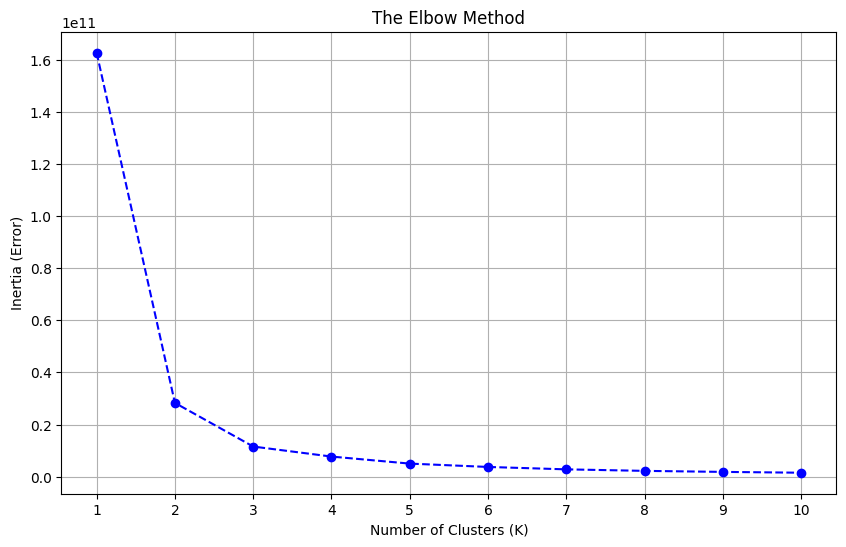

In [ ]:
# 1. Calculate error (Inertia) for K=1 through 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)

# 2. Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Error)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

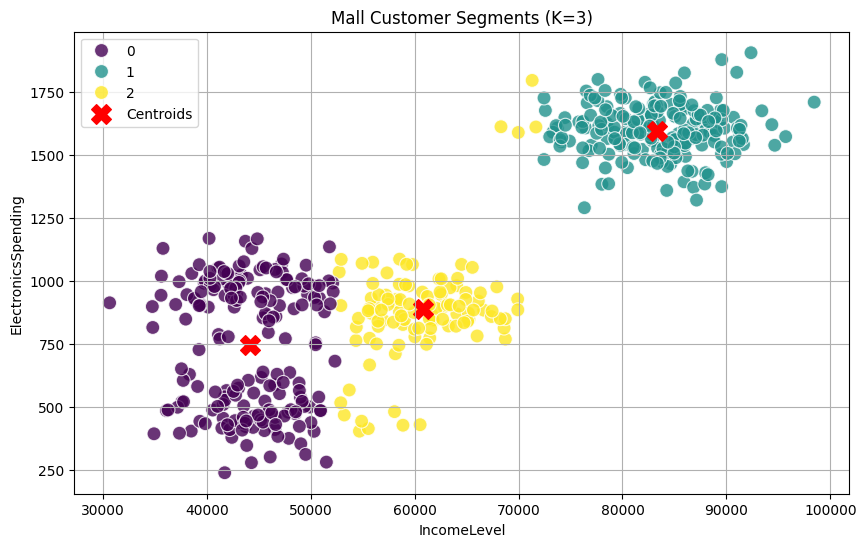

In [ ]:

optimal_k = 3

# 1. Train the final model
model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = model.fit_predict(df_numeric)

# 2. Plot the results
plt.figure(figsize=(10, 6))

# Auto-detect column names for Income and Spending
col_income = [c for c in df.columns if 'Income' in c][0]
col_spending = [c for c in df.columns if 'Spending' in c or 'Score' in c][0]

sns.scatterplot(
    data=df,
    x=col_income,
    y=col_spending,
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.8
)

# 3. Plot the Centers (Red X)
centers = model.cluster_centers_
# Note: Centers are in the same order as df_numeric columns.
# We need to find which index belongs to Income and Spending.
idx_income = df_numeric.columns.get_loc(col_income)
idx_spending = df_numeric.columns.get_loc(col_spending)

plt.scatter(
    centers[:, idx_income],
    centers[:, idx_spending],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

plt.title(f'Mall Customer Segments (K={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


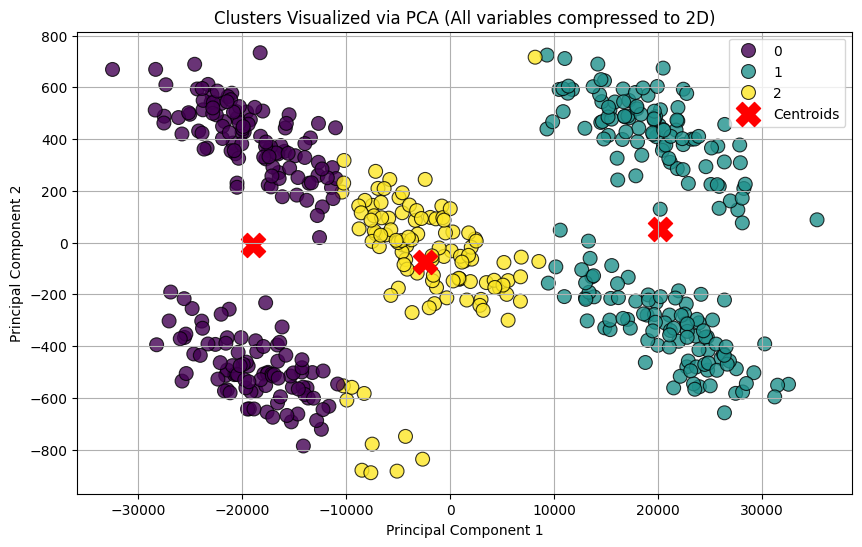

In [ ]:
from sklearn.decomposition import PCA

# 1. Initialize and Run PCA (17 dims -> 2 dims)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_numeric)

# 2. Transform the CENTROIDS too
#    We must squeeze the 17D cluster centers down to 2D so they fit on the graph.
centers_pca = pca.transform(model.cluster_centers_)

# 3. Create a clean dataframe for plotting
df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# 4. Plot Everything
plt.figure(figsize=(10, 6))

# The Clusters
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='black'
)

# The Centroids (Red X)
plt.scatter(
    centers_pca[:, 0], # PC1 coordinate of centroids
    centers_pca[:, 1], # PC2 coordinate of centroids
    c='red',
    s=300,
    marker='X',
    label='Centroids'
)

plt.title('Clusters Visualized via PCA (All variables compressed to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# --- Computer Vision Image Segmentation ---


--- Processing for K=2 ---


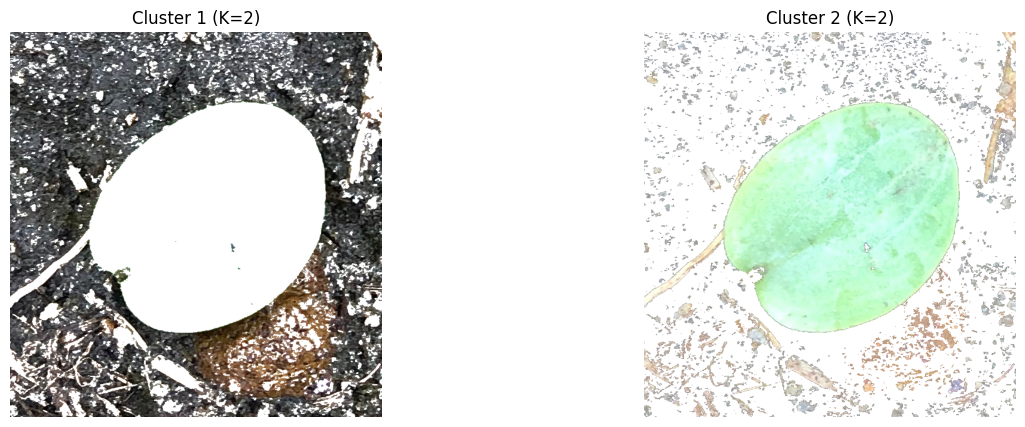


--- Processing for K=3 ---


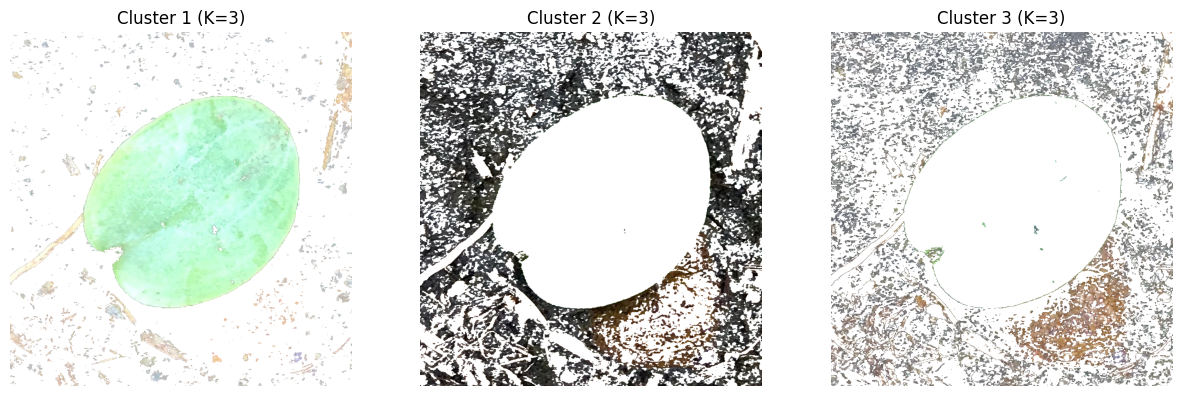


--- Processing for K=4 ---


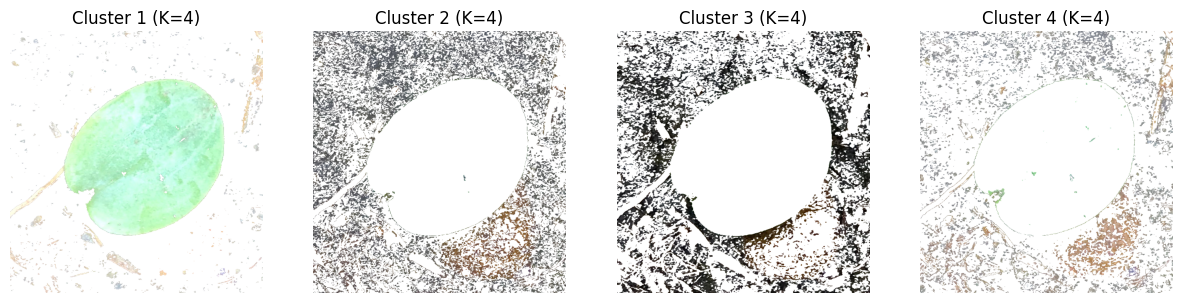


--- Processing for K=5 ---


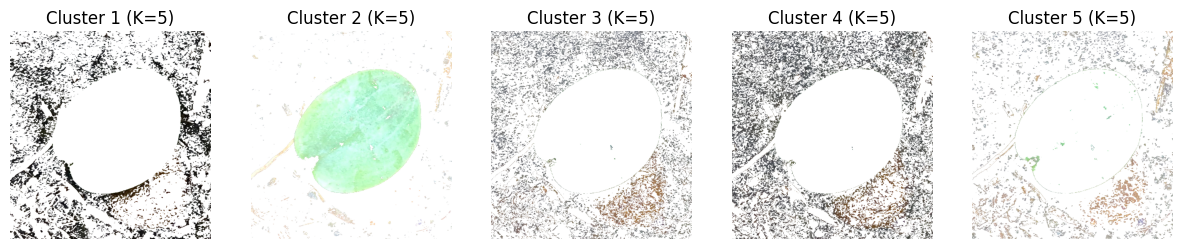

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def process_plant_image(image_path, k_values=[2, 3, 4, 5]):
    # 1. Load the image
    # OpenCV loads in BGR, so we convert to RGB for correct colors
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not find image at {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 2. Reshape the image into a list of pixels
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # 3. Loop through required K values (2, 3, 4, 5)
    for k in k_values:
        print(f"\n--- Processing for K={k} ---")

        # Train K-Means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(pixel_values)

        # reshape labels back to original image shape (Height, Width)
        labels_reshaped = labels.reshape(img.shape[0], img.shape[1])

        # 4. Generate the "Segmented Output" (One image per cluster)
        plt.figure(figsize=(15, 5))

        for i in range(k):

            # We want to keep cluster 'i', and turn everything else WHITE [255, 255, 255]

            # reshape labels to match pixel_values for easy masking
            # (If label is NOT i, set color to White)
            non_cluster_mask = (labels != i)

            # Reshape mask back to image dimensions for plotting
            # We actually need to manipulate the flat array first for speed, then reshape
            seg_flat = pixel_values.copy()
            seg_flat[non_cluster_mask] = [255, 255, 255] # Turn background White

            # Reshape back to image
            final_img = seg_flat.reshape(img.shape).astype(np.uint8)

            # Plotting
            plt.subplot(1, k, i+1)
            plt.imshow(final_img)
            plt.axis('off')
            plt.title(f'Cluster {i+1} (K={k})')

        plt.show()


process_plant_image('image_002.png', k_values=[2, 3, 4, 5])